In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Set random seed for reproducibility
np.random.seed(seed=2345)

In [41]:
raw_df: pd.DataFrame = pd.read_csv(filepath_or_buffer='../../data/data_6_channels_train.csv')
raw_df.rename(
    columns={
        "fid": "fid",
        "year": "year",
        "class": "is_disturbance",
        "numerical_id": "forest_id",
        "BLU": "blue",
        "GRN": "green",
        "RED": "red",
        "NIR": "near_infrared",
        "SW1": "shortwave_infrared_1",
        "SW2": "shortwave_infrared_2",
    },
    inplace=True,
)
raw_df.drop(labels=["fid"], axis=1, inplace=True)
raw_df.head()

,year,is_disturbance,forest_id,blue,green,red,near_infrared,shortwave_infrared_1,shortwave_infrared_2
0,1985,0,87,349.0,714.0,480.0,4015.0,2014.0,652.0
1,1986,0,87,310.0,507.0,384.0,3916.0,1890.0,606.0
2,1987,0,87,329.0,606.0,457.0,4043.0,2225.0,856.0
3,1988,0,87,230.0,500.0,286.0,3815.0,1952.0,646.0
4,1989,0,87,178.0,491.0,390.0,3839.0,2103.0,755.0


In [33]:
raw_df.describe()

,year,is_disturbance,forest_id,blue,green,red,near_infrared,shortwave_infrared_1,shortwave_infrared_2
count,453660.000000,453660.000000,453660.000000,453660.000000,453660.000000,453660.000000,453660.000000,453660.000000,453660.000000
mean,2001.189788,0.004113,10010.612285,299.848594,504.539162,379.420734,3045.083016,1542.402507,610.965670
std,9.617561,0.064002,5761.520914,130.803142,173.888849,191.933937,858.865394,545.997404,292.207312
min,1985.000000,0.000000,2.000000,-416.000000,-110.000000,-138.000000,-27.000000,-15.000000,-6.000000
25%,1993.000000,0.000000,4972.000000,217.000000,389.000000,260.000000,2357.000000,1119.000000,420.000000
50%,2001.000000,0.000000,10329.000000,279.000000,470.000000,332.000000,3030.000000,1531.000000,564.000000
75%,2009.000000,0.000000,14964.000000,357.000000,582.000000,441.000000,3661.000000,1898.000000,726.000000
max,2018.000000,1.000000,20084.000000,3291.000000,3555.000000,3863.000000,9498.000000,6110.000000,5291.000000


In [34]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453660 entries, 0 to 453659
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  453660 non-null  int64  
 1   is_disturbance        453660 non-null  int64  
 2   forest_id             453660 non-null  int64  
 3   blue                  453660 non-null  float64
 4   green                 453660 non-null  float64
 5   red                   453660 non-null  float64
 6   near_infrared         453660 non-null  float64
 7   shortwave_infrared_1  453660 non-null  float64
 8   shortwave_infrared_2  453660 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 31.2 MB


# Split dataset

In [ ]:
from sklearn.model_selection import train_test_split

# We need a test, validation and training set
# Maybe we will use 20% of the data for testing, 20% for validation and 60% for training
# We need to take care of the time series aspect of the data
# i.e. we should split based on the forest_id (i.e. dont split the same forest_id into train and test)


# Split the unique forest_ids into train, validation, and test sets
unique_forest_ids = raw_df["forest_id"].unique()
train_ids, temp_ids = train_test_split(unique_forest_ids, test_size=0.4, random_state=2345)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=2345)

# Create masks for the splits
train_mask = raw_df["forest_id"].isin(values=train_ids)
val_mask = raw_df["forest_id"].isin(values=val_ids)
test_mask = raw_df["forest_id"].isin(values=test_ids)

# Split the data
train_df = raw_df[train_mask]
val_df = raw_df[val_mask]
test_df = raw_df[test_mask]

train_df.shape, val_df.shape, test_df.shape

((272210, 9), (90734, 9), (90716, 9))

In [40]:
test_df.to_csv("test.csv", index=False)

# Visuals

KeyError: 'class'

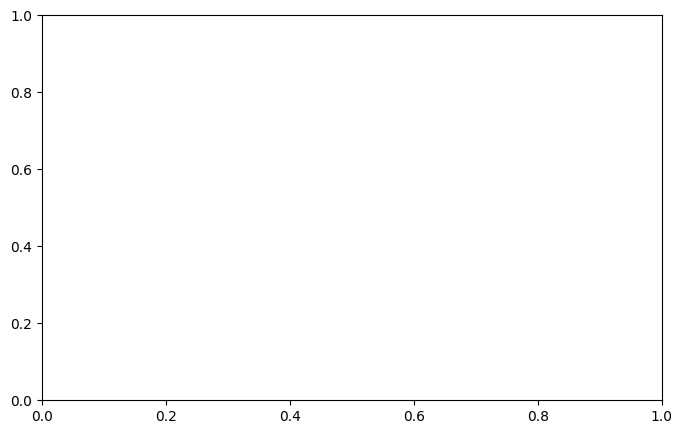

In [36]:
from matplotlib.figure import Figure
from matplotlib.axes import Axes


fig: Figure = plt.figure(figsize=(8, 5))  # width, height
ax: Axes = fig.subplots(nrows=1, ncols=1)  # type: ignore

raw_df.plot(
    kind="scatter",
    x="BLU",
    y="GRN",
    grid=False,
    ax=ax,
    xlabel="BLU",
    ylabel="RED",
    # color depending on column class
    color=raw_df["class"],
    colormap="viridis",
    s=1,
)

plt.show()


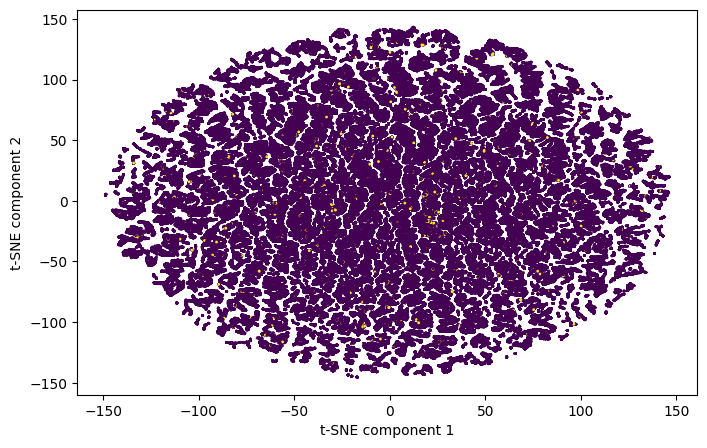

In [ ]:
# use tsne from scikit learn to reduce the dimensionality of the data and plot it

# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=2345)
# X = raw_df.drop(columns=["class"]).values
# y = raw_df["class"].values
# X_tsne = tsne.fit_transform(X)
# fig: Figure = plt.figure(figsize=(8, 5))  # width, height
# ax: Axes = fig.subplots(nrows=1, ncols=1)  # type: ignore
# ax.scatter(
#     X_tsne[:, 0],
#     X_tsne[:, 1],
#     c=y,
#     cmap="viridis",
#     s=1,
# )
# ax.set_xlabel("t-SNE component 1")
# ax.set_ylabel("t-SNE component 2")
# plt.show()
